# Project Report

Team Members: Thomas Nguyen, Jose Martinez, Tim Park, Shyam Patel

# Introduction

Research Question: Does gentrification have an effect on the number of criminal offenses in DC?

Motivation: 
Gentrification is defined as the restoration and upgrading of deteriorated urban property by middle-class or affluent people, often resulting in the displacement of lower-income people. Gentrification aims to shift the demographics and average income of an area to be more middle and upper class by increasing the property values in that area. Because of increased property values, lower-income people cannot afford to live in that area and are forced to move out. An overarching goal of gentrification is to bring in more affluent people, thereby reducing the crime rate. Families and working professionals are enticed to move into these areas by the appeal of redevelopment, however, we want to determine if these areas are becoming safer to live in. 

Sources: 
In order to answer our research question, we first had to determine which wards in DC were experiencing gentrification. To identify which wards in DC were undergoing a large amount of redevelopment, we examined building permits datasets from 2013-2017. The main variables of interests from these datasets were the 'PERMIT_TYPE_NAME', the 'PERMIT_SUBTYPE_NAME', and the 'APPLICATION_STATUS_NAME'. These variables indicated which permits were related to redevelopment while also verifying that the permit request was approved. 

(https://opendata.dc.gov/datasets/building-permits-in-2013)
(https://opendata.dc.gov/datasets/building-permits-in-2014)
(https://opendata.dc.gov/datasets/building-permits-in-2015)
(https://opendata.dc.gov/datasets/building-permits-in-2016)
(https://opendata.dc.gov/datasets/building-permits-in-2017)

Next we examined datasets which included information about all the crime incidents reported per year. The main variables of interest from these datasets were the type of crimes and the ward that the crimes took place in. We used these datasets to identify if there was a shift in the number of crimes incidents per ward, which may have possibly been related to gentrification. Our group researched each crime dataset from 2013 to 2017 inclusively. 

(https://opendata.dc.gov/datasets/crime-incidents-in-2013)
(https://opendata.dc.gov/datasets/crime-incidents-in-2014)
(https://opendata.dc.gov/datasets/crime-incidents-in-2015)
(https://opendata.dc.gov/datasets/crime-incidents-in-2016)
(https://opendata.dc.gov/datasets/crime-incidents-in-2017)
 

The third dataset we looked further into was the median household income per ward in order to identify shifts in median househould income that may have been related to people being displaced due to gentrification. 

(https://planning.dc.gov/sites/default/files/dc/sites/op/page_content/attachments/2011-2015%20Ward.xls)

# Methods

First, we used OpenRefine to be able to clean these rather large datasets as doing it in excel would be an inefficient use of our time. For the crime datasets, the first thing that was initially done was removing all the duplicates within the dataset along with all the blank/null spaces in the csv file. When we applied this change for each year originally we had we narrowed down each dataset to about six thousand from the original 30,000+. However, this caused a problem being that all the data in wards 3, 6, and 7 were excluded. As a result, we decided to not remove the blank values and we simply just fixed any spelling and grammar issues. These changes allowed for  us to view the data efficiently and effectively

For the building permits datasets, we had more specific issues such as: Permit_Subtype_name had  Overlapping Categories, so they were combined together (i.e. “Electrical”, “Electrical – General”, “Electrical – Heavy Up”) and also merged “Miscellaneous” and “NA”; “ FULL_ADDRESS”   had several overlapping Addresses that were formatted differently; NEIGHBORHOOD_CLUSTER had “Cluster” in the values so we had to reformat the values so that we would just be left with the integer; for DISTRICT we changed values from string to Integer (i.e. “First” is now “1”). 

# Preprocessing

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# read in building permits datasets and add a column for the year, then concat
permits2013 = pd.read_csv('bp2013.csv')
permits2013['YEAR'] = 2013

permits2014 = pd.read_csv('bp2014.csv')
permits2014['YEAR'] = 2014

permits2015 = pd.read_csv('bp2015.csv')
permits2015['YEAR'] = 2015

permits2016 = pd.read_csv('bp2016.csv')
permits2016['YEAR'] = 2016

permits2017 = pd.read_csv('bp2017.csv')
permits2017['YEAR'] = 2017

permits = pd.concat([permits2013,permits2014,permits2015,permits2016,permits2017])
permits.head()

,X,Y,OBJECTID,DCRAINTERNALNUMBER,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,PERMIT_CATEGORY_NAME,APPLICATION_STATUS_NAME,...,ANC,SMD,DISTRICT,PSA,NEIGHBORHOODCLUSTER,HOTSPOT2006NAME,HOTSPOT2005NAME,HOTSPOT2004NAME,BUSINESSIMPROVEMENTDISTRICT,YEAR
0,-77.012385,38.915015,445781691,251304352,2013-04-18T00:00:00.000Z,P1304352,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,5E,5E07,3,308,21,NaN,NaN,NaN,NaN,2013
1,-76.986665,38.900433,445781692,251304353,2013-04-18T00:00:00.000Z,P1304353,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,6A,6A06,1,104,25,NaN,NaN,NaN,NaN,2013
2,-77.042574,38.935275,445781693,251304356,2013-04-18T00:00:00.000Z,P1304356,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,1D,1D03,3,302,2,NaN,NaN,NaN,NaN,2013
3,-76.975966,38.904180,445781694,251304360,2013-04-18T00:00:00.000Z,P1304360,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,5D,5D03,5,507,23,NaN,NaN,NaN,NaN,2013
4,-77.043516,38.916665,445781695,251304361,2013-04-18T00:00:00.000Z,P1304361,SUPPLEMENTAL,PLUMBING AND GAS,NaN,PERMIT ISSUED,...,1C,1C01,3,303,1,NaN,NaN,NaN,NaN,2013


In [15]:
# identify permit types related to redevlopment and place in a list
print(permits.PERMIT_TYPE_NAME.unique())

redevelopment = ['CONSTRUCTION','SUPPLEMENTAL']

['SUPPLEMENTAL' 'CONSTRUCTION' 'HOME OCCUPATION' 'POST CARD'
 'SHOP DRAWING']


In [14]:
# identify permit subtypes related to new development and place in a list
print(permits.PERMIT_SUBTYPE_NAME.unique())

new = ['NEW BUILDING']

['PLUMBING AND GAS' 'ADDITION' 'ADDITION ALTERATION REPAIR'
 'ALTERATION AND REPAIR' 'EXPEDITED' 'AWNING' 'CIVIL PLANS' 'DEMOLITION'
 'CAPACITY PLACARD' 'FENCE' 'EXCAVATION ONLY' 'FOUNDATION ONLY'
 'MISCELLANEOUS' 'GARAGE' 'NEW BUILDING' 'RAZE' 'RETAINING WALL'
 'PROJECTION' 'SIGN' 'SHEETING AND SHORING' 'SHED' nan 'BUILDING'
 'TENANT LAYOUT' 'ELECTRICAL - GENERAL' 'SWIMMING POOL' 'SPECIAL SIGN'
 'GAS FITTING' 'MECHANICAL' 'ELECTRICAL - HEAVY UP' 'BOILER'
 'ELEVATOR - NEW' 'PLUMBING' 'ELEVATOR - REPAIR' 'ELECTRICAL'
 'SOLAR SYSTEM' 'ELEVATOR' 'SPECIAL BUILDING']


In [18]:
# identify permit statuses that mark approval 
print(permits.APPLICATION_STATUS_NAME.unique())

approved = ['APPLICATION ACCEPTED','APPLICATION APPROVED','COMPLETED','PERMIT ISSUED','PERMIT RENEWED']

['PERMIT ISSUED' 'COMPLETED' 'REVIEW IN PROCESS' 'APPLICATION CANCELED'
 'PERMIT CANCELED' 'PERMIT REVISED' 'PDOXNEWNOW' 'PDOXPRODONE'
 'READY FOR ISSUANCE' 'APPLICATION WITHDRAWN' 'ZONING APPROVED'
 'APPLICATION ACCEPTED' 'PERMIT REVOKED' 'PAYMENT PENDING'
 'PERMIT CANCELED REFUND' 'REVIEW IN PROGRESS' 'PROJECTDOX UNDER REVIEW'
 'PERMIT WITHDRAWN' 'PERMIT RENEWED' 'REVEIW IN PROCESS'
 'INSPECTION FAILED' 'SUBMITTED' 'WALK THROUGH ACCEPTED'
 'PERMIT ISSUED - NO FEE' 'APPLICATION APPROVED' 'PERMIT NOT ISSUED'
 'PROJECTDOX ACCEPTED']


In [21]:
# subset permits dataset to only include matching redevelopment types and approved statuses
gentrify = permits[permits.PERMIT_TYPE_NAME.isin(redevelopment)&permits.APPLICATION_STATUS_NAME.isin(approved)&permits.PERMIT_SUBTYPE_NAME.isin(new)]
gentrify.head()

,X,Y,OBJECTID,DCRAINTERNALNUMBER,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,PERMIT_CATEGORY_NAME,APPLICATION_STATUS_NAME,...,ANC,SMD,DISTRICT,PSA,NEIGHBORHOODCLUSTER,HOTSPOT2006NAME,HOTSPOT2005NAME,HOTSPOT2004NAME,BUSINESSIMPROVEMENTDISTRICT,YEAR
13619,-77.017969,38.902282,445920873,111206956,2013-02-21T00:00:00.000Z,B1206956,CONSTRUCTION,NEW BUILDING,NaN,COMPLETED,...,6E,6E05,1,101,8,NaN,NaN,NaN,Mount Vernon Triangle CID,2013
13620,-77.054919,38.976940,445920876,111207120,2013-04-24T00:00:00.000Z,B1207120,CONSTRUCTION,NEW BUILDING,NaN,COMPLETED,...,3G,3G02,2,201,10,NaN,NaN,NaN,NaN,2013
13621,-77.007773,38.907491,445920892,111203369,2013-03-08T00:00:00.000Z,B1203369,CONSTRUCTION,NEW BUILDING,NaN,COMPLETED,...,6C,6C06,5,501,25,NaN,NaN,NaN,NoMa BID,2013
13622,-77.024437,38.898107,445920896,111204191,2013-03-20T00:00:00.000Z,B1204191,CONSTRUCTION,NEW BUILDING,NaN,COMPLETED,...,2C,2C01,2,209,8,NaN,NaN,NaN,Downtown BID,2013
13623,-77.005678,38.963123,445920931,111306108,2013-05-23T00:00:00.000Z,B1306108,CONSTRUCTION,NEW BUILDING,NaN,COMPLETED,...,4B,4B07,4,406,19,NaN,NaN,NaN,NaN,2013


In [33]:
# find the total number of permits in each ward to identify which wards are experiencing the most development
numPermits = gentrify[['PERMIT_TYPE_NAME','WARD']].groupby('WARD').agg('count')
numPermits = numPermits.reset_index()
numPermits.columns = ['WARD','Number of Permits']
numPermits

,WARD,Number of Permits
0,1,111
1,2,78
2,3,221
3,4,207
4,5,728
5,6,289
6,7,419
7,8,371


In [24]:
# read in crime incidents datasets and add a column for the year, then concat
crimes2013 = pd.read_csv('ci2013.csv')
crimes2013['YEAR'] = 2013

crimes2014 =  pd.read_csv('ci2014.csv')
crimes2014['YEAR'] = 2014

crimes2015 =  pd.read_csv('ci2015.csv')
crimes2015['YEAR'] = 2015

crimes2016 = pd.read_csv('ci2016.csv')
crimes2016['YEAR'] = 2016

crimes2017 = pd.read_csv('ci2017.csv')
crimes2017['YEAR'] = 2017

crimes = pd.concat([crimes2013,crimes2014,crimes2015,crimes2016,crimes2017])
crimes.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,YEAR
0,-77.012183,38.871394,4104147,2013-04-16T00:00:00.000Z,MIDNIGHT,KNIFE,HOMICIDE,1500 - 1599 BLOCK OF 1ST STREET SW,398943.0,133729.0,...,6400.0,Precinct 127,38.871386,-77.012180,NaN,2004-07-27T20:30:00.000Z,2004-07-27T20:30:00.000Z,366716924,04104147-01,2013
1,-77.054969,38.899776,9251354,2013-02-27T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,2500 - 2699 BLOCK OF VIRGINIA AVENUE NW,395232.0,136881.0,...,5600.0,Precinct 3,38.899768,-77.054966,NaN,2009-01-01T00:00:00.000Z,2009-01-01T00:00:00.000Z,366782027,09251354-01,2013
2,-76.967310,38.872120,10033521,2013-10-10T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,2800 - 2821 BLOCK OF PENNSYLVANIA AVENUE SE,402837.0,133810.0,...,7604.0,Precinct 111,38.872112,-76.967307,NaN,2008-12-29T20:00:00.000Z,2008-12-29T20:00:00.000Z,366785439,10033521-01,2013
3,-76.975118,38.917289,10028985,2013-02-27T00:00:00.000Z,MIDNIGHT,OTHERS,SEX ABUSE,1800 - 2299 BLOCK OF NEW YORK AVENUE NE,402158.0,138824.0,...,11100.0,Precinct 72,38.917282,-76.975116,NaN,2010-03-07T02:30:00.000Z,2010-03-07T02:45:00.000Z,366785797,10028985-01,2013
4,-76.996185,38.927922,11010107,2013-07-31T00:00:00.000Z,MIDNIGHT,OTHERS,HOMICIDE,3000 - 3099 BLOCK OF 7TH STREET NE,400331.0,140004.0,...,9201.0,Precinct 74,38.927914,-76.996183,NaN,2011-01-23T07:50:00.000Z,NaN,366813849,11010107-01,2013


In [32]:
# find total number of offenses by ward
numCrimes = crimes[['WARD','OFFENSE']].groupby('WARD').agg('count')
numCrimes = numCrimes.reset_index()
numCrimes.columns = ['WARD','Number of Offenses']
numCrimes

,WARD,Number of Offenses
0,1,20742
1,2,26055
2,3,7238
3,4,12891
4,5,19525
5,6,23665
6,7,17659
7,8,15788


In [31]:
# find the total number of offenses by the type of crime
typeCrimes = crimes[['WARD','OFFENSE']].groupby('OFFENSE').agg('count')
typeCrimes = typeCrimes.reset_index()
typeCrimes.columns = ['Type of Crime','Number of Offenses']
typeCrimes

,Type of Crime,Number of Offenses
0,ARSON,64
1,ASSAULT W/DANGEROUS WEAPON,8912
2,BURGLARY,9548
3,HOMICIDE,515
4,MOTOR VEHICLE THEFT,10675
5,ROBBERY,12486
6,SEX ABUSE,1271
7,THEFT F/AUTO,43928
8,THEFT/OTHER,56164


In [28]:
# read in economic census dataset
census = pd.read_csv('2011-2015_economic.csv',skiprows = 2)
census.head()

,Subject,"Ward 1 (2014), District of Columbia",Unnamed: 2,Unnamed: 3,Unnamed: 4,"Ward 2 (2014), District of Columbia",Unnamed: 6,Unnamed: 7,Unnamed: 8,"Ward 3 (2014), District of Columbia",...,Unnamed: 24,"Ward 7 (2014), District of Columbia",Unnamed: 26,Unnamed: 27,Unnamed: 28,"Ward 8 (2014), District of Columbia",Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,Estimate,Margin of Error,Percent,Percent Margin of Error,Estimate,Margin of Error,Percent,Percent Margin of Error,Estimate,...,Percent Margin of Error,Estimate,Margin of Error,Percent,Percent Margin of Error,Estimate,Margin of Error,Percent,Percent Margin of Error,NaN
1,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Population 16 years and over,"73,213","+/-1,742","73,213",(X),"73,661","+/-1,655","73,661",(X),"71,627",...,(X),"58,160","+/-1,571","58,160",(X),"59,155","+/-1,501","59,155",(X),NaN
3,In labor force,"56,901","+/-1,619",77.70%,+/-1.2,"53,554","+/-1,361",72.70%,+/-1.4,"50,305",...,+/-0.9,"33,519","+/-1,162",57.60%,+/-1.4,"34,101","+/-1,232",57.60%,+/-1.6,NaN
4,Civilian labor force,"56,786","+/-1,627",77.60%,+/-1.2,"53,273","+/-1,351",72.30%,+/-1.4,"50,196",...,+/-0.9,"33,480","+/-1,165",57.60%,+/-1.4,"32,807","+/-1,210",55.50%,+/-1.6,NaN


In [30]:
# create dataframe for median household income by ward by using index slicing
income = census.iloc[78,[1,5,9,13,17,21,25,29]]
income = income.reset_index()
income.columns = ['WARD','Median Household Income']
income

,WARD,Median Household Income
0,"Ward 1 (2014), District of Columbia","82,159"
1,"Ward 2 (2014), District of Columbia","100,388"
2,"Ward 3 (2014), District of Columbia","112,873"
3,"Ward 4 (2014), District of Columbia","74,600"
4,"Ward 5 (2014), District of Columbia","57,554"
5,"Ward 6 (2014), District of Columbia","94,343"
6,"Ward 7 (2014), District of Columbia","39,165"
7,"Ward 8 (2014), District of Columbia","30,910"


In [34]:
# make median income into an integer
income['Median Household Income'] = income['Median Household Income'].str.replace(',','').astype(int)

In [36]:
# change label for ward to match other dataframe so they can be merged
# for example, change Ward 1 to 1
income.iloc[0,0] = 1
income.iloc[1,0] = 2
income.iloc[2,0] = 3
income.iloc[3,0] = 4
income.iloc[4,0] = 5
income.iloc[5,0] = 6
income.iloc[6,0] = 7
income.iloc[7,0] = 8
income

,WARD,Median Household Income
0,1,82159
1,2,100388
2,3,112873
3,4,74600
4,5,57554
5,6,94343
6,7,39165
7,8,30910


In [37]:
# merge variables of interest into a single dataset
merged = numPermits.merge(numCrimes,on='WARD',how='outer').merge(income,on='WARD',how='outer')
merged

,WARD,Number of Permits,Number of Offenses,Median Household Income
0,1,111,20742,82159
1,2,78,26055,100388
2,3,221,7238,112873
3,4,207,12891,74600
4,5,728,19525,57554
5,6,289,23665,94343
6,7,419,17659,39165
7,8,371,15788,30910


# Results

In [42]:
# find correlations between variables of interest
merged.corr()

,WARD,Number of Permits,Number of Offenses,Median Household Income
WARD,1.000000,0.596340,-0.100469,-0.732799
Number of Permits,0.596340,1.000000,-0.067027,-0.585440
Number of Offenses,-0.100469,-0.067027,1.000000,0.008786
Median Household Income,-0.732799,-0.585440,0.008786,1.000000


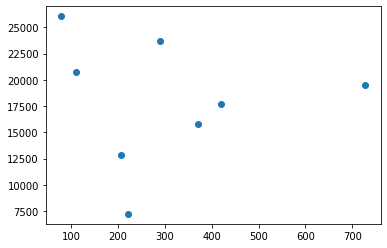

In [44]:
plt.scatter(merged['Number of Permits'],merged['Number of Offenses'])

# Discussion

From our analysis we found that there isn't a correlation between gentrification and the amount of crime that occurred in DC. The number of crimes that occurred over the period of time from 2013-2017 does not show a significant impact with the residents who live in the D.C. area. We noticed from the gradual ascendance of 2013 to 2017 that the crime rates had slightly gone up until 2016, where we saw a drop of the crime rate in 2017. After conducting tests, we cannot surely say that there is a strong correlation for this from the gentrification occurring in each specific wards. 

The graphs illustrate that there is no significant correlation between the building permits and the crime rates in D.C. We know this because of the steady and similarly lined up lines that demonstrate this comparison. In the scenario that the building permits showed one direction and the crime rates were significantly different, we could potentially conclude a correlation between the two for gentrification and crime rate, but this was not the case. This is also backed up by the statistical measures calculated through the correlation tests. These two factors aided in concluding that there is no significant result here.

# Limitations

One large limitation to this experiment are the years that we selected. Our group wanted to choose some recent years that had a strong and supportive data library from an open source data set. In doing so, we also wanted to choose some recent years so that our results would be accurately represented. By choosing five years, we believed that this would be a wide enough spread of data which would lead us to strong conclusions. However, if we had chosen a larger year range (perhaps 2012 - 2018), then we could have drawn more definitive conclusions. Another limitation was the amount of crimes being reported in the wards in D.C. because surely not every crime is reported. In addition to this, we had to clean the data, which led to us removing some reports in order to run tests.

Also, we weren't able to find median household income by ward for each year, rather we were only able to find median household income for a range of years. Ideally we would want to identify shifts in median household income per year to better identify areas experiencing gentrification. 

Another limitation was that we had to subjectively identify which areas were experiencing redevelopment related to gentrification by examining the permit types and the permit subtypes. There is a chance that we might not have accurately captured which building permits were related to gentrification as some permits related may have been left out and some unrelated may have been included in our analysis.

Finally, gentrification has to do with restoring and updating old buildings, but we had difficulty differenting between personal renovation projects and renovation related to gentrification by the building permit types. We found that when we included building permit types related to additions and alterations, there were too many results related to personal home projects. In order to avoid this, we only included permit types related to new development which wasn't ideal, but it focused our analysis so that we didn't have as many unrelated results.

# Conclusion

Based on our analysis, the number of criminal offenses isn't correlated to the number of building permits in areas that we identified as experiencing gentrification. This shows that gentrification does not reduce the number of crimes in DC. 